In [1]:
from keras.layers import  Dense
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

2025-04-07 11:29:28.720751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

Found 400 files belonging to 2 classes.
Clases: ['homen', 'mulher']


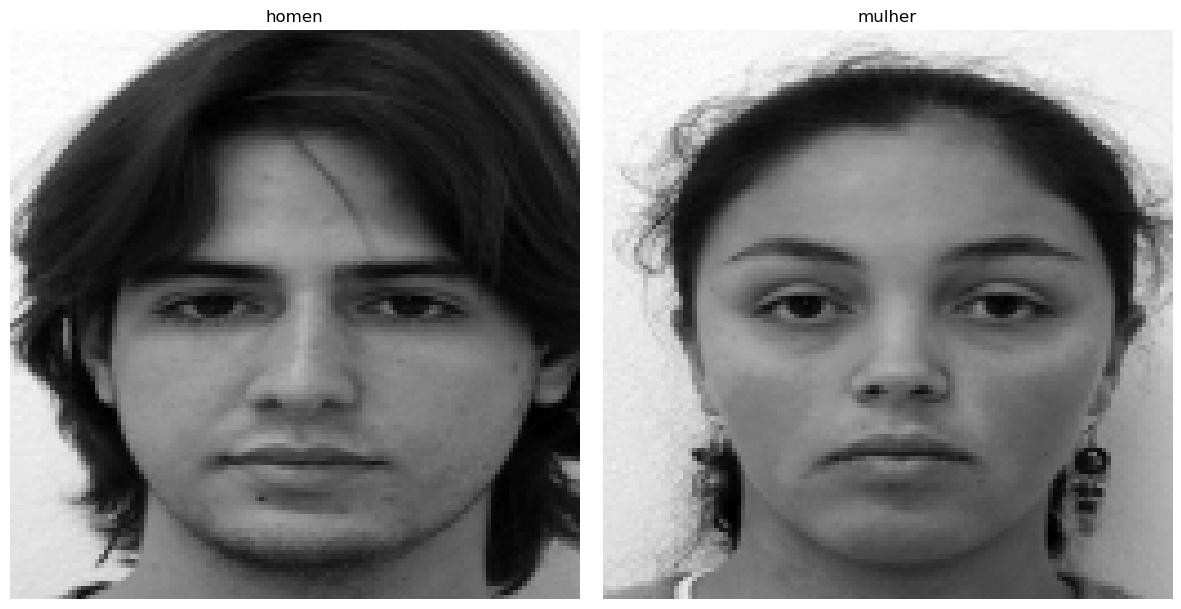

In [3]:
ruta_dataset = "/prj/posgrad/samuelrt/Documentos/Doutorado/images"

# Cargar el dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    ruta_dataset,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Obtener nombres de las clases
class_names = dataset.class_names
print("Clases:", class_names)

def rgb_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)  # convierte (128, 128, 3) → (128, 128, 1)
    return image, label

# Aplicar la transformación al dataset
gray_dataset = dataset.map(rgb_to_grayscale)

# Diccionario para guardar una imagen por clase
sample_images = {}

# Recorremos el dataset
for images, labels in gray_dataset:
    for img, label in zip(images, labels):
        class_idx = label.numpy()
        if class_idx not in sample_images:
            sample_images[class_idx] = img
        if len(sample_images) == len(class_names):
            break
    if len(sample_images) == len(class_names):
        break

# Mostrar una imagen por clase
plt.figure(figsize=(12, 6))
for i, class_idx in enumerate(sorted(sample_images.keys())):
    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(sample_images[class_idx].numpy().astype("uint8"),cmap='gray')
    plt.title(class_names[class_idx])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [4]:
type(next(dataset.ragged_batch(batch_size=2).as_numpy_iterator()))

tuple

In [11]:
gray_dataset = [*gray_dataset]
# gray_dataset = np.array(gray_dataset)
# imgs, lbls = gray_dataset.
len(gray_dataset[1])

2

In [9]:

for _ in gray_dataset:
    print(len(_))

2
2
2
2
2
2
2
2
2
2
2
2
2


In [13]:
print(len(dataset[0]))

TypeError: '_PrefetchDataset' object is not subscriptable

In [16]:
import math 
k = 4
n_batch = len(dataset)
k_idx = np.arange(math.ceil(n_batch / k))
k_idx

array([0, 1, 2, 3])

In [ ]:
for idx in k_idx:
    print(dataset)